In [2]:
!pip install -r requirements.txt

In [79]:
import pandas as pd

df = pd.read_csv(
    "/Users/alexandrzvonarev/Desktop/TSanalys/data_test/USATECHIDXUSD_H4.csv", 
    delimiter="\t",  # Change this to ',' if it's a comma-separated file
    parse_dates=["Time"],  # Ensure the Time column is treated as datetime
)

df.head ()

,Time,Open,High,Low,Close,Volume
0,2013-05-22 12:00:00,3029.127,3045.114,3025.834,3041.517,60
1,2013-05-22 16:00:00,3041.819,3043.369,2983.541,2998.587,240
2,2013-05-22 20:00:00,2997.980,3007.990,2997.980,3004.966,156
3,2013-05-23 00:00:00,3005.197,3006.972,2991.833,2992.470,240
4,2013-05-23 04:00:00,2992.252,2995.952,2964.510,2973.456,240


In [83]:
def preprocess_data(uploaded_file):
    delimiters = [",", "\t", ";"]
    for delimiter in delimiters:
        try:
            df = pd.read_csv(uploaded_file, delimiter=delimiter)
            if df.shape[1] > 1:
                break
        except Exception:
            continue

    if 'df' not in locals():
        return None

    if not isinstance(df.index, pd.DatetimeIndex):
        possible_time_cols = [col for col in df.columns if "date" in col.lower() or "time" in col.lower()]
        
        if possible_time_cols:
            df[possible_time_cols[0]] = pd.to_datetime(df[possible_time_cols[0]], errors="coerce")
            df.set_index(possible_time_cols[0], inplace=True)

    return df

In [84]:
df = preprocess_data("/Users/alexandrzvonarev/Desktop/TSanalys/data_test/USATECHIDXUSD_H4.csv")

df.head ()

,Open,High,Low,Close,Volume
Time,,,,,
2013-05-22 12:00:00,3029.127,3045.114,3025.834,3041.517,60
2013-05-22 16:00:00,3041.819,3043.369,2983.541,2998.587,240
2013-05-22 20:00:00,2997.980,3007.990,2997.980,3004.966,156
2013-05-23 00:00:00,3005.197,3006.972,2991.833,2992.470,240
2013-05-23 04:00:00,2992.252,2995.952,2964.510,2973.456,240


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

df = df.set_index('Time')

print(df)

                          Open       High        Low      Close  Volume
Time                                                                   
2013-05-22 12:00:00   3029.127   3045.114   3025.834   3041.517      60
2013-05-22 16:00:00   3041.819   3043.369   2983.541   2998.587     240
2013-05-22 20:00:00   2997.980   3007.990   2997.980   3004.966     156
2013-05-23 00:00:00   3005.197   3006.972   2991.833   2992.470     240
2013-05-23 04:00:00   2992.252   2995.952   2964.510   2973.456     240
...                        ...        ...        ...        ...     ...
2023-09-08 16:00:00  15327.639  15349.049  15241.219  15280.629     240
2023-09-08 20:00:00  15279.669  15308.799  15279.619  15301.739      15
2023-09-11 00:00:00  15309.189  15321.389  15284.759  15306.819     240
2023-09-11 04:00:00  15306.857  15388.109  15305.559  15372.389     240
2023-09-11 08:00:00  15373.669  15385.189  15349.879  15370.019     120

[14944 rows x 5 columns]


<Axes: xlabel='Time'>

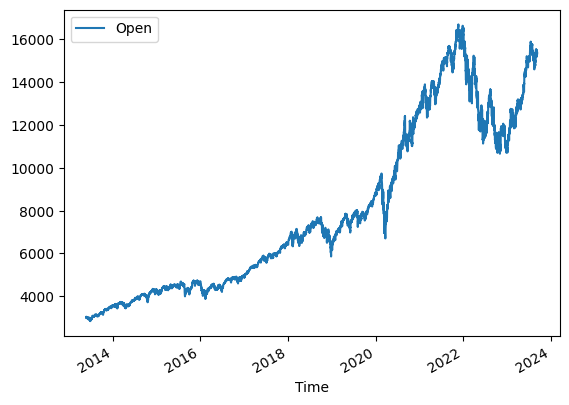

In [78]:
df = df[["Open"]]
df.plot()

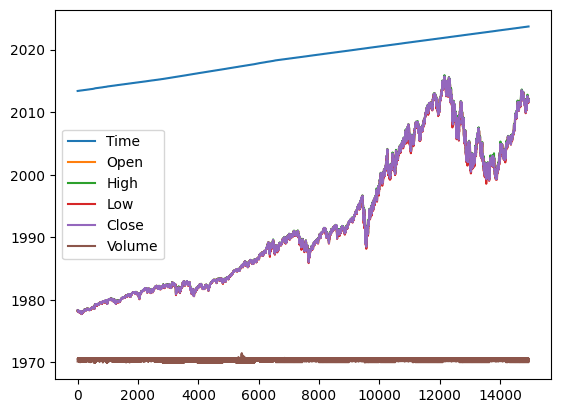

In [70]:
import numpy as np

data.plot()
data.index = pd.to_datetime (data.index)

<Axes: >

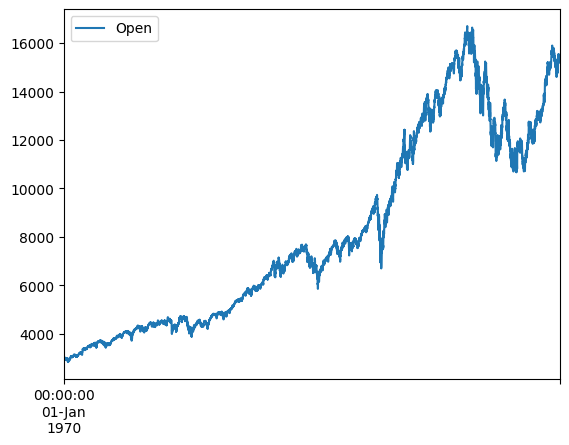

In [71]:
data = data [["Open"]]
data.plot()

In [62]:
def differencing_order(data):
    d = 0
    temp_data = data.copy()
    while True:
        adf_test = adfuller(temp_data)
        if adf_test[1] <= 0.05:  # Stationary
            break
        d += 1
        temp_data = temp_data.diff().dropna()
        if d > 2: #prevent infinate loops.
          break;
    return d

In [63]:
for i in range(1):
    data = data.diff().dropna()


<Axes: >

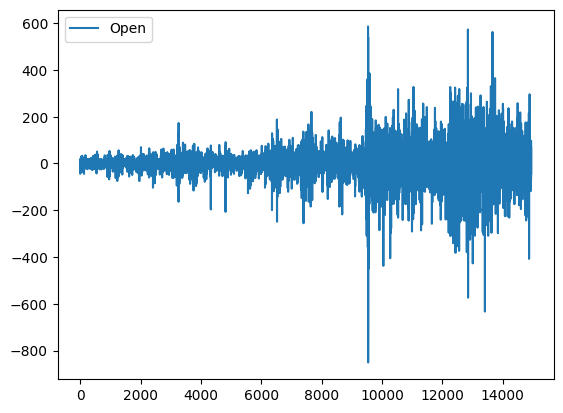

In [64]:
data.plot()